# 常態分配(Normal Distribution)

## 平均數的機率

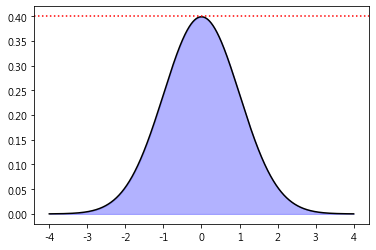

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 觀察值範圍
z1, z2 = -4, 4

# 樣本點
x = np.arange(z1, z2, 0.001) 
y = norm.pdf(x,0,1)

# 繪圖
plt.plot(x,y,'black')

# 對平均數的pdf畫虛線
plt.axhline(.4, c='r', linestyle=':')

# 填色
plt.fill_between(x,y,0, alpha=0.3, color='b')
plt.show()

## 常態分配的各種信賴區間

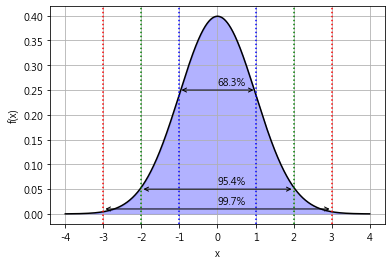

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 觀察值範圍
z1, z2 = -4, 4

# 樣本點
x = np.arange(z1, z2, 0.001) 
y = norm.pdf(x,0,1)

# 繪圖
plt.plot(x,y,'black')


# 設定圖形屬性
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# 對正負1、2、3倍標準差畫虛線
plt.axvline(-3, c='r', linestyle=':')
plt.axvline(3, c='r', linestyle=':')
plt.axvline(-2, c='g', linestyle=':')
plt.axvline(2, c='g', linestyle=':')
plt.axvline(-1, c='b', linestyle=':')
plt.axvline(1, c='b', linestyle=':')

# 1 倍標準差機率
plt.annotate(text='', xy=(-1,0.25), xytext=(1,0.25), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='68.3%', xy=(0,0.26), xytext=(0,0.26))
# 2 倍標準差機率
plt.annotate(text='', xy=(-2,0.05), xytext=(2,0.05), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='95.4%', xy=(0,0.06), xytext=(0,0.06))
# 3 倍標準差機率
plt.annotate(text='', xy=(-3,0.01), xytext=(3,0.01), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='99.7%', xy=(0,0.02), xytext=(0,0.02))

# 填色
plt.fill_between(x,y,0, alpha=0.3, color='b')
plt.show()

## 範例1. 以美國歷屆總統的身高資料，計算各式描述統計量及95%的信賴區間。

In [2]:
import random 
import pandas as pd
import numpy as np

# 讀取檔案
df = pd.read_csv('./data/president_heights.csv')
df.rename(columns={df.columns[-1]:'height'}, inplace=True)

# 計算信賴區間
m = df['height'].mean()
sd = df['height'].std()
print(f'平均數={m}, 標準差={sd}, 信賴區間=({m-2*sd}, {m+2*sd})')

平均數=179.73809523809524, 標準差=7.015868855358296, 信賴區間=(165.70635752737866, 193.76983294881182)


## 範例2. 利用隨機亂數產生常態分配的樣本，再使用SciPy的統計模組(stats)計算信賴區間

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 產生隨機亂數的樣本
mu = 5     # 平均數
sigma = 2  # 標準差
n = 10000  # 樣本數
data = np.random.normal(mu, sigma, n)

cl = .95   #信賴水準(Confidence Level)

# 計算信賴區間
m = data.mean()
sd = data.std()
y1 = norm.interval(cl, m, sd)
print(f'平均數={m}, 標準差={sd}, 信賴區間={y1}')

平均數=4.990627125127197, 標準差=2.011224329365575, 信賴區間=(1.0486998747399467, 8.932554375514448)


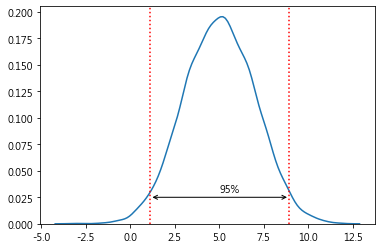

In [15]:
import seaborn as sns

# 直方圖，參數 hist=False：不畫階梯直方圖，只畫平滑曲線
sns.distplot(data, hist=False)

# 畫信賴區間
plt.axvline(y1[0], c='r', linestyle=':')
plt.axvline(y1[1], c='r', linestyle=':')

# 標示 95%
plt.annotate(text='', xy=(y1[0],0.025), xytext=(y1[1],0.025), 
             arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='95%', xy=(mu,0.03), xytext=(mu,0.03))

plt.show()

## 範例3. 利用隨機亂數產生二項分配的樣本，再使用SciPy的統計模組(stats)計算信賴區間

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# 產生隨機亂數的樣本
trials = 1  # 實驗次數
p = 0.5     # 出現正面的機率
n = 10000   # 樣本數
data = np.random.binomial(trials, p, n)

cl = .95   #信賴水準(Confidence Level)

# 計算信賴區間
m = data.mean()
sd = data.std()
y1 = binom.interval(cl, n, m)
print(f'平均數={m}, 標準差={sd}, 信賴區間={y1}')

平均數=0.5039, 標準差=0.4999847897686489, 信賴區間=(4941.0, 5137.0)


In [29]:
(p*(1-p))**.5

0.5